In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [174]:
df=pd.read_csv("insurance.csv")

In [175]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [176]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [177]:
missing_values=df.isnull().sum()
missing_values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [178]:
no_of_duplicates=df.duplicated().sum()
no_of_duplicates

np.int64(1)

In [179]:
to_drop=df[df.duplicated(keep=False)]
to_drop

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [180]:
df=df.drop_duplicates(keep='first')

In [181]:
no_of_duplicates=df.duplicated().sum()
no_of_duplicates

np.int64(0)

In [182]:
df.select_dtypes(include='number').skew()

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

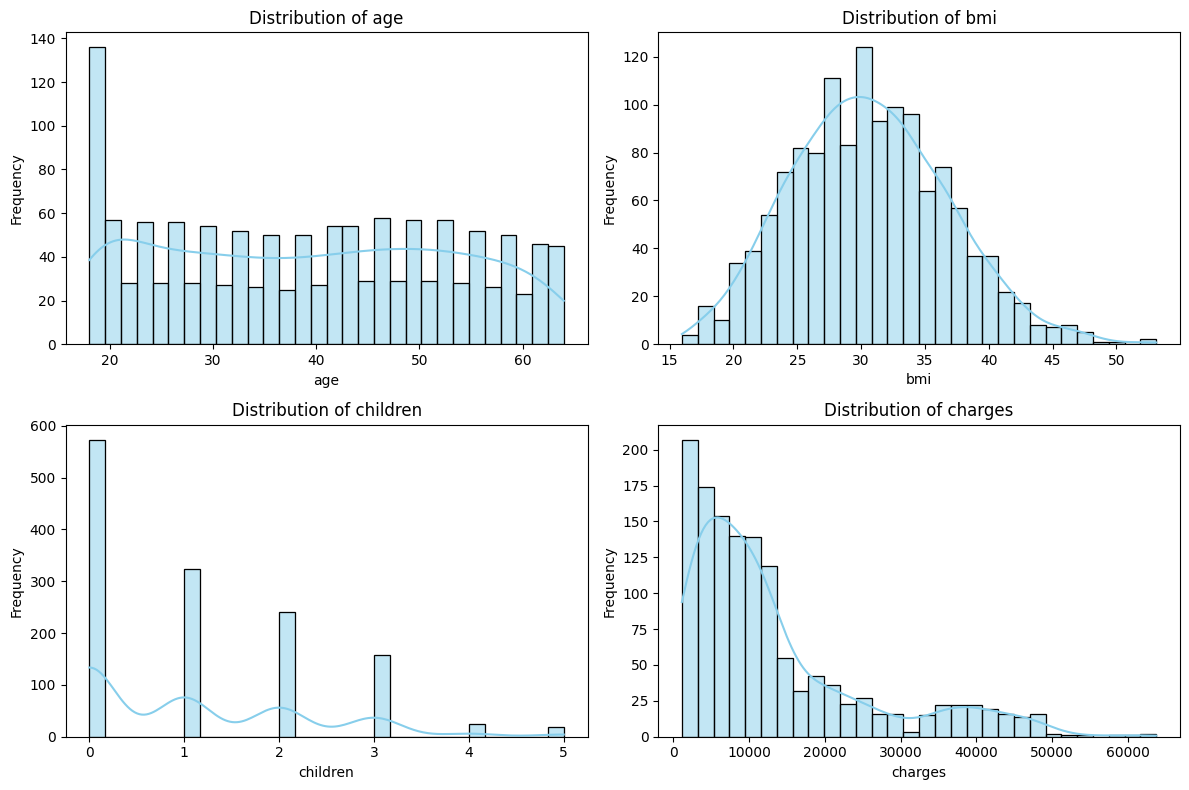

In [183]:
numeric_cols=['age','bmi','children','charges']
plt.figure(figsize=(12,8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [184]:
corr=df.select_dtypes(include='number').corr()

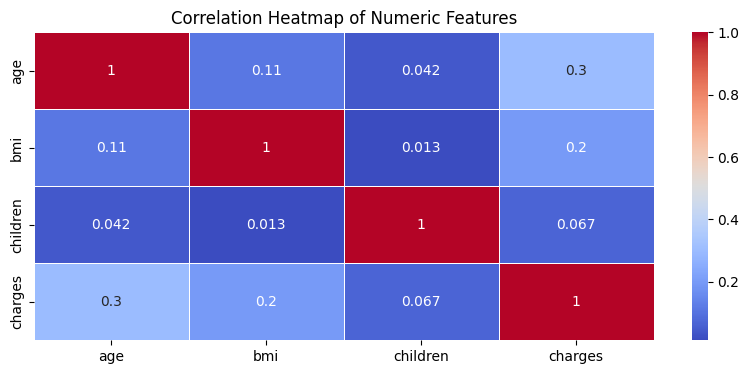

In [185]:
plt.figure(figsize=(10,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [186]:
cat_cols = df.select_dtypes(include='object')  
unique_counts = cat_cols.nunique()  
print(unique_counts)


sex       2
smoker    2
region    4
dtype: int64


In [187]:
cat_cols = ['sex', 'smoker','children', 'region']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True) 
df.head()

,age,bmi,charges,sex_male,smoker_yes,children_1,children_2,children_3,children_4,children_5,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,False,True,False,False,False,False,False,False,False,True
1,18,33.770,1725.55230,True,False,True,False,False,False,False,False,True,False
2,28,33.000,4449.46200,True,False,False,False,True,False,False,False,True,False
3,33,22.705,21984.47061,True,False,False,False,False,False,False,True,False,False
4,32,28.880,3866.85520,True,False,False,False,False,False,False,True,False,False


In [188]:
X = df.drop("charges", axis=1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [189]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=10,
    min_samples_split=5
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [190]:
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

print(f"MSE: {mse:.2F}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.3f}")

MSE: 20023009.46
RMSE: 4474.71
MAE: 2491.33
R²: 0.891


In [191]:
import pickle

training_columns = X_train.columns.tolist()
with open("rf_model.pkl", "wb") as f:
    pickle.dump((rf, training_columns), f)

